# Using Machine Learning to Predict Heart Disease

"[Heart disease](("https://www.cdc.gov/heartdisease/facts.htm")) is the leading cause of death in the United States. This epidemic is the reason behind about 25% of deaths in the country each year. The nation is seeing a rise in heart disease as rates of obesity an type 2 diabetes increase.

There are many factors that contribute to developing heart disease. Among these include high blood pressure, high cholesterol, high blood sugar and more. A physician can take these measurements and run tests to determine whether a person has damage to the heart, blocked arteries, etc.

The purpose of this project is to develop a machine learning model that can classify a patient as having heart disease or not based on the results of these tests. We want to know which features and algorithm are best for accurately predicting the disease.



### Data Dictionary
The data comes from the [UCI Machine Learning Repository]("https://archive.ics.uci.edu/ml/datasets/heart+disease")
- age:
- sex: 1 = male; 0 = female
- cp: type of chest pain:
    - 1 = typical angina
    - 2 = atypical angina
    - 3 = non-anginal
    - 4 = asymptomatic
- trestbp: resting systolic blood pressure (mmHg)
- chol: serum cholesterol (mg/dl)
- fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- goal: prescence of heart disease ( 0 = absence; 1-4 = prescence) 

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='darkgrid')


In [3]:
# Load the data
heart = pd.read_csv('processed.cleveland.csv',encoding='latin',header = None)

# Add the header columns
header_cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','goal']
heart.columns = header_cols


## Exploring the Data / Feature Engineering

In [4]:
# Display first 10 rows
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [5]:
# Show dataset info
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  goal      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


### Heart Disease Indicator

We want the goal column to be a set of binary values that indicate whether or not the patient was diagnosed with heart disease. To do this we will change all values greater than 0 to a value of 1, where 1 = prescence of disesase; 0 = absence.

In [6]:
# Replace values 1-4 with 1
heart['heart_disease'] = heart.goal.apply(lambda x: 1 if x > 0 else 0)

# Drop the goal column
heart = heart.drop('goal',axis=1)


### Colinearity

To help reduce overfitting in the model later, we checked the correlations between features below in the heatmap to look for colinearity. The only strongly correlated features are 'slope' and 'oldpeak'. We will explore these columns later to decide to either remove one feature or engineer a new feature to make this information more useful.

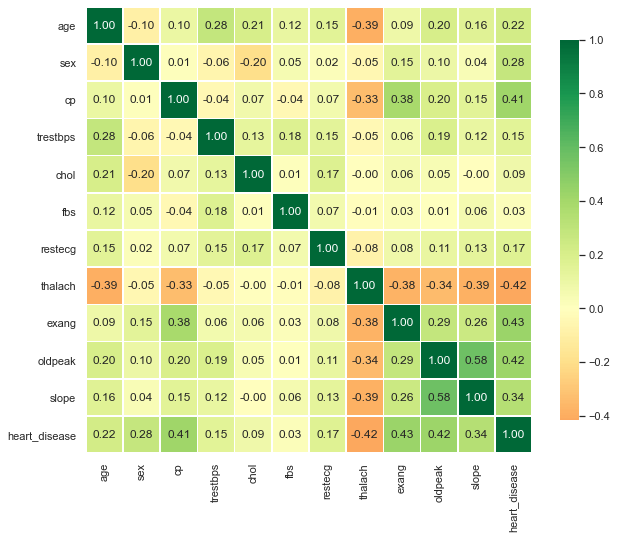

In [8]:
# Generate correlation matrix for the dataset
correlations = heart.corr()

# Plot the correlations in a heatmap
fig,ax= plt.subplots(figsize=(10,10))
sns.heatmap(correlations, cmap='RdYlGn',vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})

### Exploring Age

First, we want to see how age relates to heart disease. We expect heart disease to be  more prevalent in older patients. 

Below we see that the youngest patient admitted was 29 years old and the oldest was 77. The standard deviation is about 10, so we will create age categories by decade.

In [9]:
# Statistics for age values
heart.age.describe()

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [10]:
# Create age categories
cutpoints = [0,29,40,50,60,70,80]
labels = ['< 30','30s','40s','50s','60s','70s']
heart['age_categories'] = pd.cut(heart.age,cutpoints,labels = labels)

Text(0.5, 1.0, 'Heart Disease Patients by Age')

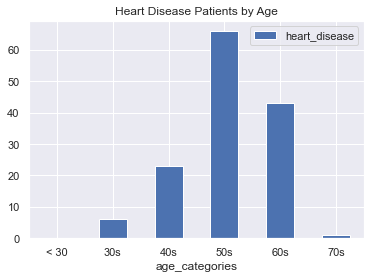

In [11]:
# Plot heart disease cases based on age
heart.pivot_table(index='age_categories',values='heart_disease',aggfunc=sum).plot.bar(rot=0)
plt.title('Heart Disease Patients by Age')

We see what we expected, that is, heart disease cases are higher among older patients, specifically for those in their 50s and 60s. 

***


### Heart Disease Based on Sex

From the plot below we can see that more male patients were diagnosed with heart disease than not, while fewer females were diagnosed with heart disease than not. Gender seems to be a useful feature for prediction.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Heart Disease Based on Sex')

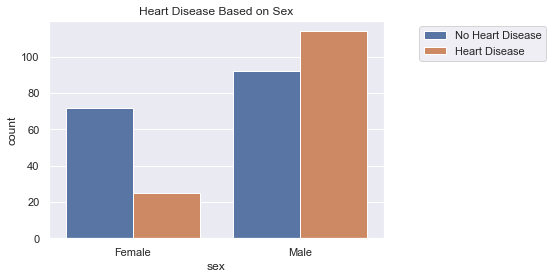

In [12]:
# Plot cases among sexes
fig, ax = plt.subplots()
sns.countplot('sex',hue='heart_disease',data = heart,ax=ax)
plt.xticks(ticks = [0,1],labels = ['Female','Male'])
plt.legend(labels=['No Heart Disease','Heart Disease'],bbox_to_anchor=(1.5,1))
plt.title('Heart Disease Based on Sex')

### Sex and Age

From the plots below we see that there were significantly fewer younger females (those under the age of 50) with heart disease than older females. Younger males also had fewer cases, which shows that in this group males over the age of 49 were most likely to have heart disease. Of course that is not the only predictor.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Heart Disease Among Older Patients')

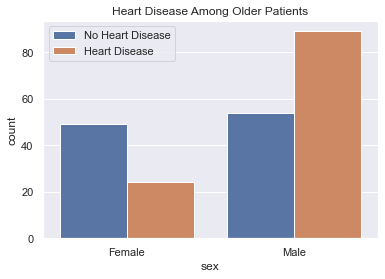

In [13]:
# Plots of cases based on older age and sex
fig, ax = plt.subplots()
sns.countplot('sex',hue='heart_disease',data = heart[heart.age>49],ax=ax)
plt.xticks(ticks = [0,1],labels = ['Female','Male'])
plt.legend(labels=['No Heart Disease','Heart Disease'])
plt.title('Heart Disease Among Older Patients')


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Heart Disease Among Younger Patients')

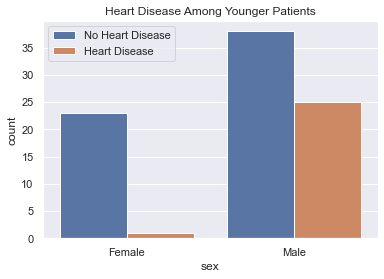

In [14]:
# Plots for younger age and sex
fig, ax = plt.subplots()
sns.countplot('sex',hue='heart_disease',data = heart[heart.age<=49],ax=ax)
plt.xticks(ticks = [0,1],labels = ['Female','Male'])
plt.legend(labels=['No Heart Disease','Heart Disease'])
plt.title('Heart Disease Among Younger Patients')

### Types of Chest Pain and Heart Disease

The data categorizes types of chest pain based on whether or not it was anginal. _Angina_ is a type of severe chest pain that is caused by lack of blood flow to the heart. It is a symptom of coronary artery disease, which is a specific type of heart disease. 

According to ['Textbook of Cardiology']('https://www.textbookofcardiology.org/wiki/Chest_Pain_/_Angina_Pectoris'), typical angina is classified by "substernal chest discomfort ... [that is] provoked by exertion or emotional stress... [and] relieved by rest..."

Atypical angina occurs when 2 of the 3 symptoms described above are present. Non-anginal chest pain occurs when only one symptom above is presesnt. 


     

Text(0.5, 1.0, 'Heart Disease Cases Based on Chest Pain')

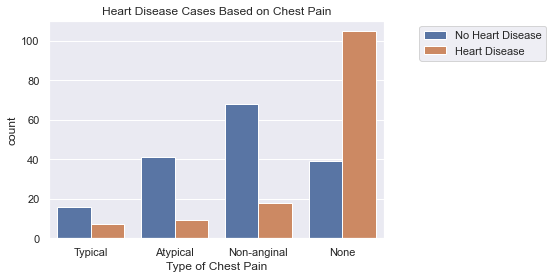

In [15]:
# Create count plot for chest pain categories and heart disease cases
sns.countplot(x='cp',hue='heart_disease',data=heart)
plt.legend(labels=['No Heart Disease','Heart Disease'],bbox_to_anchor=(1.5,1))
plt.xticks(ticks=[0,1,2,3],labels=['Typical','Atypical','Non-anginal','None'])
plt.xlabel('Type of Chest Pain')
plt.title('Heart Disease Cases Based on Chest Pain')

From the plot above we see that in the majority of heart disease cases, the patients did not have chest pain. To make this data more useful we'll create a column that indicates whether or not the patient experienced chest pain. 

In [16]:
# Make in_pain column
heart['in_pain'] = heart.cp.apply(lambda x: 0 if x==4 else 1)

In [17]:
# Display some rows from new column
heart[['in_pain','cp']].head(5)

,in_pain,cp
0,1,1.0
1,0,4.0
2,0,4.0
3,1,3.0
4,1,2.0


### Resting Blood Pressure

To examine how blood pressure relates to heart disease here we will first categorize the values:

- low blood pressure: 90 mmHg or less
- normal blood pressure: between 90 mmHg and 140 mmHg
- high blood pressure: 140 mmHg or greater


In [18]:
# Categorize blood pressure
heart['bp_categories'] = pd.cut(heart.trestbps,[0,91,120,140,300],labels=['low','ideal','normal','high'])


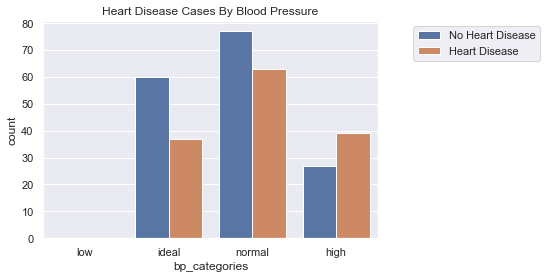

In [19]:
# Plot case counts for bp
sns.countplot(x='bp_categories',hue='heart_disease',data=heart)
plt.title('Heart Disease Cases By Blood Pressure')
plt.legend(labels=['No Heart Disease','Heart Disease'],bbox_to_anchor=(1.5,1))

### Cholesterol

Cholesterol is a good predictor for heart disease. Low density cholesterol clogs arterys and high density cholesterol helps to clear arteries. The amount of each of these greatly impact a person's heart health. 


The chol column contains the serum or total blood cholesterol measurement for each person in milligrams per deciliter of blood. Serum cholesterol is measured by adding the Low Density and High density cholesterol to 20% of the person's triglyceride level. 

For both people over the age of 20, a normal cholesterol level ranges from 125-200 mg/dL.
Below we see that we the minimum cholesterol measurement is 126 and the maximum is 564. We will categorize the values in this column as either normal or high based on the range above.

In [20]:
# Run stats for chol column
heart.chol.describe()

count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: chol, dtype: float64

In [21]:
# Create column with 1 if chol is high or 0 if chol is low
heart['high_chol'] = heart.chol.apply(lambda x: 1 if x > 200 else 0)

<ipython-input-22-24e61bb2840c>:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(chol_piv,autopct='%.2f%%',colors=['b','r'])


Text(0.5, 1.0, 'Heart Disease Based On Cholesterol')

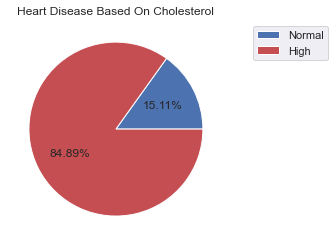

In [22]:
# Plotting chol and heart disease 
chol_piv = heart.pivot_table(index='high_chol',values='heart_disease',aggfunc=sum)
plt.pie(chol_piv,autopct='%.2f%%',colors=['b','r'])
plt.legend(labels=['Normal','High'],bbox_to_anchor=(1.5,1))
plt.title('Heart Disease Based On Cholesterol')

We see that of those that were diagnosed with heart disease, about 85% had high serum cholesterol levels.

### Fasting Blood Sugar

The fbs column in the dataset describes whether or not the patient had a fasting blood sugar level above 120 mg/dL. A value of 1 indicates that this is true and 0 indicates it is false. A high fasting blood sugar increases the likelyhood of heart disease.

We see from the plot below that most of the heart disease patients did not have high fasting blood sugar levels.

<ipython-input-23-4e1b852647c4>:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(fbs_piv,autopct='%.2f%%',colors=['b','r'])


Text(0.5, 1.0, 'Heart Disease and Fasting Blood Sugar')

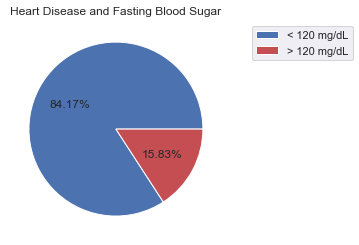

In [23]:
# Make pivot table for fbs col
fbs_piv = heart.pivot_table(index='fbs',values='heart_disease',aggfunc=sum)

# Plot pivot table results in pie chart
plt.pie(fbs_piv,autopct='%.2f%%',colors=['b','r'])
plt.legend(labels=['< 120 mg/dL','> 120 mg/dL'],bbox_to_anchor=(1.1,1))
plt.title('Heart Disease and Fasting Blood Sugar')

### Resting ECG Results

Another factor that could indicate heart disease is the resting electrocardiogram (ECG). The column restecg has values 0 for normal ecg, 1 for an abonormality in the ST wave, and 2 for left ventricular hypertrophy. 

From the plot below we see that the most of the patients either had normal ECG results or signs of LV Hypertrophy. To simplify this column we will categorize values of 0 as normal and values of 1 or 2 as abnormal. 

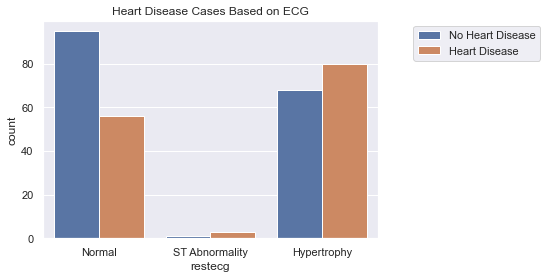

In [24]:
# Plot heart disease cases based on resting ecg states
sns.countplot(x='restecg',hue='heart_disease',data=heart)
plt.title('Heart Disease Cases Based on ECG')
plt.xticks(ticks=[0,1,2],labels=['Normal','ST Abnormality','Hypertrophy'])
plt.legend(labels=['No Heart Disease','Heart Disease'],bbox_to_anchor=(1.5,1))

In [25]:
# Categorize restecg as nomral = 0 or abnormal = 1
heart['restecg_abnormal'] = heart.restecg.apply(lambda x: 0 if x == 0 else 1)

### Measurements During Exercise

Each person in this dataset underwent exercise and various measurements were recorded:

- maximum heart rate achieved during exercise
- whether or not the person suffered angina, brought on by exercise
- the level of ST depression in the ECG
- the slope of the ST segement in the ECG

In an ECG measurement the ST segement refers to the period of the cardiac cycle after ventricular contraction and before repolarization of the ventricle. An ST segment is usually depressed (meaning below the isoelectric line, i.e. it has electrical potential) as a result of myocardial infarction (heart attack) or coronary ischemia (lack of blood supply to the heart). Both of these conditions are related to heart disease. 

Usually if the ST segement is upsloped ischemia is unlikely, while a flat or downsloped ST segement is a good indicator of ischemia.

Below we will examine how heart rate and ST depression relate to exercise induced angina and the slope of the ST segment.

#### Maximum Heart Rate


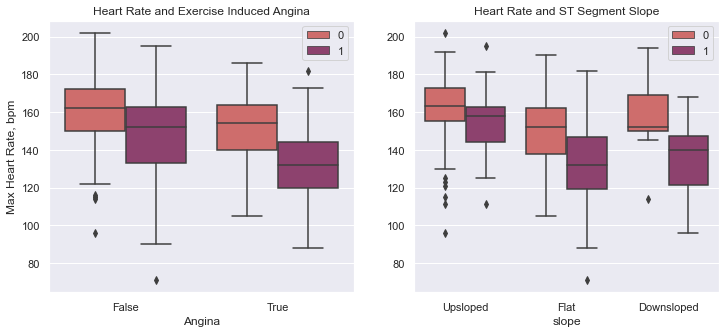

In [26]:
# Plot Heart rate with exang and slope
fig, axes = plt.subplots(1,2,figsize=(12,5))
sns.boxplot(x='exang',y='thalach',hue='heart_disease',data=heart,ax=axes[0],palette='flare')
axes[0].set_title('Heart Rate and Exercise Induced Angina')
axes[0].set_xlabel('Angina')
axes[0].set_xticklabels(['False','True'])
axes[0].set_ylabel('Max Heart Rate, bpm')
axes[0].legend()
sns.boxplot(x='slope',y='thalach',hue='heart_disease',data=heart,ax=axes[1],palette='flare')
axes[1].set_title('Heart Rate and ST Segment Slope')
axes[1].set_xticklabels(['Upsloped','Flat','Downsloped'])
axes[1].set_ylabel('')
axes[1].legend()


From the plots above we see that those who had exercise induced angina on average had lower maximum heart rates than those that did not experience angina. For either groups, those with heart disease achieved lower heart rates during exercise than those who are healthy.

Those who had upsloped ST segements on average achieved higher heart rates than those with flat or downsloped  ST segements. Similaryly, those with heart disease achieved lower heart rates than those in the respective groups that were healthy.


#### Maximum Heart Rate and Age

It seems that achieving a lower maximum heart rate correlates with having heart disease. However, we know that as a person ages, the healthy maximum heart rate also decreases because it is calculated by subtracting a person's age from 220. We also know that the older groups of people were more likely to have heart disease.

The plot below shows the max heart rate distributions based on age category. It is true that the heart rate decreases with age, however we see that those with heart disease have significantly lower heart rates than those who do not. 

We can use this information by creating a feature that indicates whether the max heart rate is considered 'low'. To do this we'll divide the dataset by age, where young people (< 50) with a maximum heart rate less than 160 and older people (>= 50) with a maximum heart rate less than 140 will be considered as having achieved a low maximum heart rate.


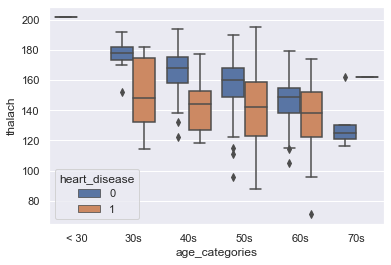

In [27]:
# Plot Heart rate distribution by age category
sns.boxplot(x='age_categories',y='thalach',hue='heart_disease',data=heart)

In [28]:
def process_hr(df):
    """Creates binary column for low maximum heart rate
    
    """
    low_maxhr = list()
    for index,row in df.iterrows():
        if row.age < 50 and row.thalach < 160:
            low_maxhr.append(1)
        elif row.age >= 50 and row.thalach < 140:
            low_maxhr.append(1)
        else:
            low_maxhr.append(0)
    df['low_maxhr'] = low_maxhr
    return df
            

In [29]:
# Create low max hr columns
heart = process_hr(heart)

In [30]:
# Display some of the results 
heart[['age','thalach','low_maxhr']].head(5)

,age,thalach,low_maxhr
0,63.0,150.0,0
1,67.0,108.0,1
2,67.0,129.0,1
3,37.0,187.0,0
4,41.0,172.0,0


#### Old Peak

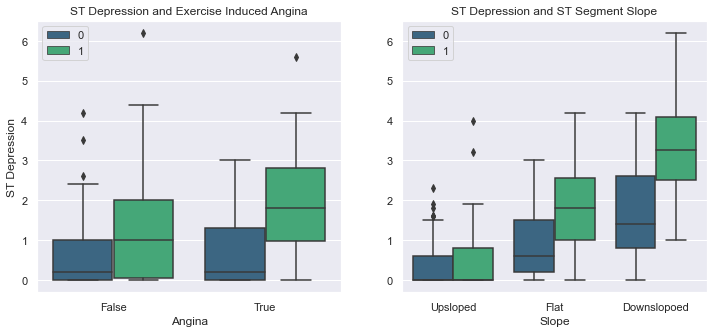

In [31]:
# Plot old peak and exang and slope
fig, axes = plt.subplots(1,2,figsize=(12,5))
sns.boxplot(x='exang',y='oldpeak',hue='heart_disease',data=heart,ax=axes[0],palette='viridis')
sns.boxplot(x='slope',y='oldpeak',hue='heart_disease',data=heart,ax=axes[1],palette = 'viridis')
axes[0].set_title('ST Depression and Exercise Induced Angina')
axes[0].set_xlabel('Angina')
axes[0].set_xticklabels(['False','True'])
axes[0].set_ylabel('ST Depression')
axes[0].legend()
axes[1].set_title('ST Depression and ST Segment Slope')
axes[1].set_xlabel('Slope')
axes[1].set_xticklabels(['Upsloped','Flat','Downslopoed'])
axes[1].set_ylabel('')
axes[1].legend()

People who experienced angina during exercise had greater ST depressions than those who did not. Those with downsloped or flat ST segements also had significantly greater depressions that the people with upsloped segments. Overall those with heart disease had greater ST depressions than those who do not have it. 

#### Likelyhood of Ischemia

We know that those with ECGs that show flat or down sloped ST segments as well as those with ST depressions are likely to have coronary ischemia, which is linked to heart disease. To capture this in the data we will create a new feature that describes the likelyhood of having ischemia based on the ECG results:

- Upsloped ST segment; No ST Depression: __Not likely__
- Upsloped ST segment; ST Depression: __Somewhat likely__
- Flat or Downsloped ST segment; No ST Depression: __Likely__
- Flat or Downsloped ST segment; ST Depression: __Very likely__

In [32]:
def prob_ischemia(df):
    """Creates categorical column for likelyhood of ischemia.
    """
    prob_isch = list()
    for index,row in df.iterrows():
        if row.slope == 1:
            if row.oldpeak == 0:
                prob_isch.append('Not likely')
            else:
                prob_isch.append('Somewhat likely')
        elif row.slope != 1:
            if row.oldpeak == 0:
                prob_isch.append('Likely')
            else:
                prob_isch.append('Very likely')
    df['prob_isch'] = prob_isch
    return df        

In [33]:
# Create prob_isch column
heart = prob_ischemia(heart)

### The Number of Obstructed Major Blood Vessels

The 'ca' column indicates the number of major blood vessels that were found to be blocked via a fluoroscopy test. 

From the plot below we see that those with 0 vessels blocked had more than twice as many patients without heart disease than with it. As the number of major vessels blocked increases to 3 we see that there are more patients in these groups with heart disease than not. Clearly the number of blocked vessels is a good predictor of heart disease. 

To make the column more useful for predictions we will assume that the unknown values mean that there are no major blood vessels blocked. Additionally, we will convert the values in the column to float type, since there is a clear numerical relationship between the possible values. 

In [34]:
# Replace '?' with 0 and convert entries to floats
heart.ca = heart.ca.apply(lambda x: 0 if x == '?' else x).astype(float)


Text(0, 0.5, 'Cases of Heart Disease')

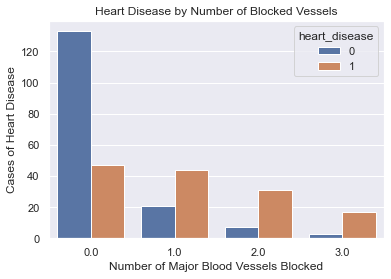

In [35]:
# Plot the occurence of heart disease by number of blood vessels
sns.countplot(x='ca',hue='heart_disease',data=heart)
plt.xlabel('Number of Major Blood Vessels Blocked')
plt.title("Heart Disease by Number of Blocked Vessels")
plt.ylabel('Cases of Heart Disease')

### Heart Status

The last feature column, "thal" tells the status of the heart based on the Thallium stress test. This test uses Thallium and imaging to show how well blood flows through the heart. Additionally, this test can show damage to the heart from previous or existing conditions.

The values in this column are

- 3 = Normal
- 6 = Fixed Defect
- 7 = Reversible Defect
- ? = Unknown

Since there are only 2 unknown values, we will count these as normal. Additionally, to make the categories more intuitive we will replace the numbers with their meaning above.



In [36]:
# Create replacement dictionary
thal_dict = {'?':'Normal','3.0':'Normal','6.0':'Fixed','7.0':'Reversible'}
# Apply replacement dictionary to thal column
heart.thal = heart.thal.map(thal_dict)

In [37]:
# Display values in thal
heart.thal.value_counts()

Normal        168
Reversible    117
Fixed          18
Name: thal, dtype: int64

We can see from the plots below that in most of the heart disease cases the patient's heart was normal or had a reversible defect. Additionally, those with defects had more cases of heart disease than not. Those without defects had fewer cases of heart disease than not. 

Text(0, 0.5, 'Heart Disease Cases')

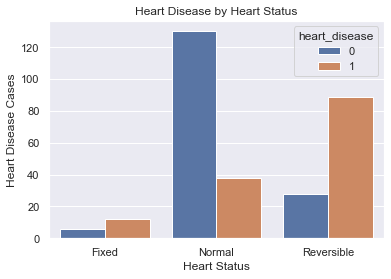

In [38]:
# Display counts of heart disease for heart status 
sns.countplot(x='thal',hue='heart_disease',data=heart)
plt.title('Heart Disease by Heart Status')
plt.xlabel('Heart Status')
plt.ylabel('Heart Disease Cases')


***

## Processing the Data

Although we have already done some data processing above, we still need to make a few adjustments in order to prepare the features for predictive modeling. Below we see from the dataset info that most of the features are numeric data types, which is what we want.

However, we do not want to imply false numerical relationships between values of ordinal variables. Additionally, we need to represent our categorical variables numerically. To do this we will create dummy variables.

In [39]:
# Display dataset information to see dtypes
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               303 non-null    float64 
 1   sex               303 non-null    float64 
 2   cp                303 non-null    float64 
 3   trestbps          303 non-null    float64 
 4   chol              303 non-null    float64 
 5   fbs               303 non-null    float64 
 6   restecg           303 non-null    float64 
 7   thalach           303 non-null    float64 
 8   exang             303 non-null    float64 
 9   oldpeak           303 non-null    float64 
 10  slope             303 non-null    float64 
 11  ca                303 non-null    float64 
 12  thal              303 non-null    object  
 13  heart_disease     303 non-null    int64   
 14  age_categories    303 non-null    category
 15  in_pain           303 non-null    int64   
 16  bp_categories     303 non-

In [40]:
# Make dummies for the columns below
cols = ['cp','slope','restecg','thal','age_categories','bp_categories','prob_isch']

# Create new data frame with all columns and dummies except those in cols above
heart_processed = pd.get_dummies(heart,prefix=cols,columns=cols,drop_first=True)

Additionally, we would like to have all of the data on the same scale, i.e from 0 to 1 so we will rescale our dataset.

In [41]:
# Use minmax_scale to scale the data
from sklearn.preprocessing import minmax_scale

# Scale the following columns
process_cols = ['age','trestbps','chol','thalach','oldpeak']
heart_processed[process_cols] = minmax_scale(heart_processed[process_cols])

## Feature Selection

In [42]:
heart_processed.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'heart_disease', 'in_pain', 'high_chol', 'restecg_abnormal',
       'low_maxhr', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'slope_2.0', 'slope_3.0',
       'restecg_1.0', 'restecg_2.0', 'thal_Normal', 'thal_Reversible',
       'age_categories_30s', 'age_categories_40s', 'age_categories_50s',
       'age_categories_60s', 'age_categories_70s', 'bp_categories_ideal',
       'bp_categories_normal', 'bp_categories_high', 'prob_isch_Not likely',
       'prob_isch_Somewhat likely', 'prob_isch_Very likely'],
      dtype='object')

In [43]:
# Import the libraries needed for feature selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

In [44]:
# Split the data into Features and target
columns = heart_processed.drop('heart_disease',axis=1).columns
X = heart_processed[columns]
y = heart_processed.heart_disease

# Split the data into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=0)

In [45]:
# Drop the target column
features = heart_processed.drop(['heart_disease'],axis=1).columns

We will use Recursive Feature Elimination with cross validation to select the best features to use in the predictive model. This method trains and fits a logistic regression model for a set of features and determines the importance of the features, eliminating the unimportant ones. It returns the set of features that yield the best accuracy score after cross validation.

In [46]:
def select_features(X,y):
    """Selects best features using 10 fold cross validation.
        
    Inputs:
        X (dataframe): Df without the target column
        y (series): The target variable
    
    Outputs:
        best_features (list): Names of the optimal features selected
    """
    lr = LogisticRegression()
    selector = RFECV(lr,cv=10)
    selector.fit(X,y)
    best_features = X.columns[selector.support_]
    print(best_features)
    return best_features


In [47]:
# Select the best features
best_features = select_features(train_X[features],train_y)

Index(['trestbps', 'chol', 'exang', 'oldpeak', 'ca', 'in_pain', 'low_maxhr',
       'cp_4.0', 'slope_2.0', 'thal_Normal', 'thal_Reversible',
       'prob_isch_Somewhat likely'],
      dtype='object')


## Selecting a Machine Learning Model

We will now build machine learning models and test them on the Training set using only the features that we selected above. 


In [48]:
# Import necessary Libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#### Machine Learning Models
The models we will use include Stochastic Gradient Descent, Random Forest Classifier, Logistic Regression, K Nearest Neighbors and Gaussian Naive Bayes. We will store these along with their respective hyperparmeters in dictionaries below.

In [49]:
# Models and parameters to test
models = [
    { 'name' : 'Stochastic Gradient Descent',
        'estimator' : SGDClassifier(),
        'hyper_params' : {'loss':['hinge','modified_huber','squared_hinge','perceptron'],
                             'alpha':[0.0001,0.0005,0.001,0.005]}
    },
    { 'name' : 'Random Forest',
         'estimator' : RandomForestClassifier(),
         'hyper_params' : {'n_estimators' : [100,125],
                            'criterion' : ['gini','entropy'],
                            'max_depth' : [5,10,12],
                            'min_samples_split' : [2,4,6],
                            'min_samples_leaf' : [2,3],
                            'oob_score' : [True,False]}
    },
    { 'name' : 'Logistic Regresssion',
      'estimator' : LogisticRegression(),
        'hyper_params' : {'solver' : ['newton_cg','lbfgs','liblinear']}
    },
    { 'name' : 'K Nearest Neighbors',
     'estimator' : KNeighborsClassifier(),
     'hyper_params' : {'n_neighbors' : [10,15,20,30],
                        'weights' : ['uniform','distance'],
                        'algorithm' : ['auto','ball_tree','kd_tree','brute']}
    },
    { 'name' : 'Gaussian Naive Bayes',
     'estimator' : GaussianNB(),
     'hyper_params' : {'priors': [None]}
    }
]

#### Function to Determine Best Model


In [50]:
def test_models(models, X,y):
    """ Tests different ML models using Randomized Search with 10 Fold Cross Validation.
    
    Inputs:
        models (dictionary): Set of models including name, estimator,hyperparmter dictionary
        X (dataframe): The df of feature to test; m rows, n cols
        y (series, array): Target variable; must have m rows
        
    Output:
        models (dictionary): The updated version of the input dictionary,
            with best model, score and parameters
        scores_df (dataframe): A dataframe with the model names and scores for easy comparison
    """
    scores = {'Model': [], 'Train_score' : []}
    for  model in models:
        grid = GridSearchCV(model['estimator'],model['hyper_params'],cv=10,scoring='accuracy')
        grid.fit(X,y)
        model['best_params'] = grid.best_params_
        model['best_score'] = grid.best_score_
        model['best_model'] = grid.best_estimator_
        print('Name: {}'.format(model['name']))
        print('Best Parameters: {}'.format(model['best_params']))
        print('Best Score: {}'.format(model['best_score']))
        
        scores['Model'].append(model['name'])
        scores['Train_score'].append(np.round(model['best_score'] * 100, 2))
    scores_df = pd.DataFrame(scores).set_index('Model').sort_values('Train_score',ascending=False)
        
    return models, scores_df
        

Above we wrote a function that loops through each model, fits and trains it and performs 10 fold cross validation to compute the accuracy. This function uses Grid Search to test each model with every combination of hyperparameters we selected. The combination of hyperparameters that yields the best score will be stored as the best parameters to use.

In [51]:
tested_models, scores_df = test_models(models,train_X[best_features],train_y)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Name: Stochastic Gradient Descent
Best Parameters: {'alpha': 0.005, 'loss': 'hinge'}
Best Score: 0.8474999999999999
Name: Random Forest
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'oob_score': True}
Best Score: 0.8559999999999999


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton

Name: Logistic Regresssion
Best Parameters: {'solver': 'lbfgs'}
Best Score: 0.8683333333333334
Name: K Nearest Neighbors
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'distance'}
Best Score: 0.8598333333333332
Name: Gaussian Naive Bayes
Best Parameters: {'priors': None}
Best Score: 0.8474999999999999


In [52]:
scores_df

,Train_score
Model,
Logistic Regresssion,86.83
K Nearest Neighbors,85.98
Random Forest,85.60
Stochastic Gradient Descent,84.75
Gaussian Naive Bayes,84.75


The scores from testing on the training set are in the table above. We see that the models with the best scores were Logistic Regression, K Nearest Neighbors, and Random Forest. 

We want to determine how much each of these models overfit. To do this we will now test each model with its best combination of hyperparameters on the Testing Set and calculate the accuracy score.

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Create another score dictionary
test_scores = {'Model':[],'Test_score':[]}

# Test the models on Testing set
for item in tested_models:
    model = item['best_model']
    model.fit(train_X[best_features],train_y)
    predictions = model.predict(test_X[best_features])
    
    try:
        item['prob'] = model.predict_proba(test_X[best_features])[:,1]
        
        
    except AttributeError: 
        item['prob'] = model.decision_function(test_X[best_features])
    
    # Compute auc score and fpr and tpr
    item['auc_score'] = roc_auc_score(test_y,item['prob'])
    item['fpr'], item['tpr'], thresh = roc_curve(test_y,item['prob'],pos_label=1)
    
    # Compute accuracy and add to dictionary of scores
    item['acc'] = round(accuracy_score(test_y,predictions) * 100,2)
    test_scores['Model'].append(item['name'])
    test_scores['Test_score'].append(item['acc'])
    
    

In [54]:
# Merge scores from evaluation on train set with scores from evaluation on test set
acc_df = pd.DataFrame(test_scores).set_index('Model')
scores = pd.concat([scores_df,acc_df],axis=1)
scores['Train - Test'] = abs(scores.Train_score - scores.Test_score)
scores

,Train_score,Test_score,Train - Test
Logistic Regresssion,86.83,81.97,4.86
K Nearest Neighbors,85.98,80.33,5.65
Random Forest,85.60,75.41,10.19
Stochastic Gradient Descent,84.75,78.69,6.06
Gaussian Naive Bayes,84.75,75.41,9.34


Above we see that models with the best test scores are Logistic Regression, K Nearest Neighbors, and Stochastic Gradient Descent, all of which overfit the least.

#### The ROC Curve and AUC Score

The ROC curve tells us the relationship between the True Positive rate and the False Positive Rate for different cutoff or threshold values that the model attains. Computing the area under the curve (AUC) tells us how well the model is able to correctly classify patients with heart disease. 

An AUC of 1 means that the model can perfectly distinguish between positive (has heart disease) and negative (does not have heart disease) cases, while an AUC of 0 means the model is clueless. A score of 0.5 means the model's predictive abilities are no better than random chance. The higher the score, the higher the true positive and true negative rate are, and the better the model is at classifying heart disease. 

In [55]:
auc_dict = {'Model':[],'AUC_score':[]}
for item in tested_models:
    auc_dict['Model'].append(item['name'])
    auc_dict['AUC_score'].append(item['auc_score'])
pd.DataFrame(auc_dict).set_index('Model').sort_values('AUC_score',ascending=False)
    

,AUC_score
Model,
Logistic Regresssion,0.870330
Random Forest,0.865934
Stochastic Gradient Descent,0.860440
Gaussian Naive Bayes,0.846154
K Nearest Neighbors,0.840110


We see that the model with the best AUC score is Logistic Regression. The plot below shows the ROC Curve for logistic regression.

Text(0.5, 1.0, 'Logistic Regression ROC Curve')

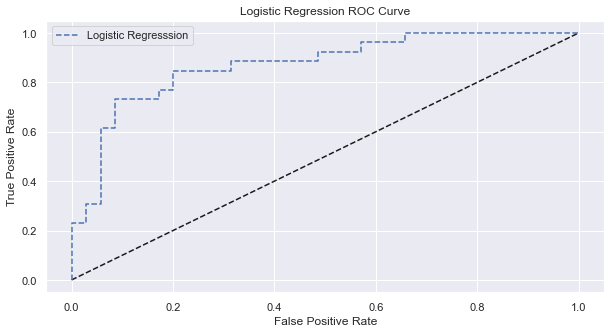

In [56]:
plt.subplots(figsize=(10,5))
rand = [0 for i in range(len(test_y))]
fpr,tpr, _= roc_curve(test_y,rand,pos_label=1)
plt.plot(fpr,tpr,linestyle='--',color='k')

lr = tested_models[2]
plt.plot(lr['fpr'],lr['tpr'],linestyle='--',label='{}'.format(lr['name']))
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

    

## Engineering more features

We want to see if we can add to our feature engineering and selection to improve our Logistic Regression Model above. 

#### Age
Before, we categorized age by decade. However, we also noticed that there are more cases of heart disease among older groups (age > 49) than not. We will instead sort the age column with binary values where 1 means the person is over the age of 49 and 0 means they are 49 or younger.

#### Number of Clogged Arteries
We saw above that there were significantly fewer case of heart disease than not among those with 0 clogged arteries, we left the original numeric values (0-3) in the column. This time we will create another binary column that describes whether or not a person has clogged arteries.



In [266]:
def process_age(df):
    """Creates column that tells whether the person is old using 49 
        as a cutoff value.
    """
    # Scale 49
    scaled_thresh = (49 - heart.age.min()) / (heart.age.max() - heart.age.min())
    df['is_old'] = df.age.apply(lambda x: 1 if x>scaled_thresh else 0)
    return df

def process_ca(df):
    """Creates column that tells whether a person has 1 or more
        clogged arteries.
    """
    df['clogged'] = df.ca.apply(lambda x: 0 if x==0 else 1)
    return df

def add_features(df):
    """Applies the functions below to the data frame.
    
    """
    df = df.copy()
    df = process_age(df)
    df = process_ca(df)
    return df
    

In [267]:
# Apply functions to train and test
train_X = add_features(train_X)
test_X = add_features(test_X)

## Reselecting Feaures

We will add the newly engineered features to the best features from before and use them to test our model

In [276]:
def train_test_lr(best):
    """Tests the sklearn LogisticRegression algorithm on the input features
            and prints the resulting AUC score and accuracy score.
    
    Inputs:
        best (array): List of best features
    """
    # Train and fit model
    lr = LogisticRegression()
    lr.fit(train_X[best],train_y)

    # Predict
    probs = lr.predict_proba(test_X[best])
    pred = lr.predict(test_X[best])

    # Display
    print('AUC Score : {}'.format(roc_auc_score(test_y,probs[:,1])))
    print('Accuracy Score : {}'.format(accuracy_score(test_y,pred)))

In [269]:
# Add new features to 'best'
features2 = ['trestbps', 'chol', 'exang', 'oldpeak', 'ca', 'in_pain', 'low_maxhr',
       'cp_4.0', 'slope_2.0', 'thal_Normal', 'thal_Reversible',
       'prob_isch_Somewhat likely','is_old','clogged']

# Test new features
train_test_lr(features2)


AUC Score : 0.8736263736263736
Accuracy Score : 0.8360655737704918


Our model improved! We noticed that the best features do not include anything about sex. However, we know that age could be a good predictive feature since we found that the proportion of males with heart disease was greater than that of females. We will add the sex column to our best features to see if this improves the model.

In [277]:
# Add sex
features3 = ['trestbps', 'chol', 'exang', 'oldpeak', 'ca', 'in_pain', 'low_maxhr',
       'cp_4.0', 'slope_2.0', 'thal_Normal', 'thal_Reversible',
       'prob_isch_Somewhat likely','is_old','clogged','sex']
train_test_lr(features3)

AUC Score : 0.8890109890109891
Accuracy Score : 0.8360655737704918


### Removing Colinear Features

We see that adding the sex column slightly improved our model. One thing that we could do to further enhance it is to look for and remove colinear features. To do this we will plot a correlation matrix as a heatmap.

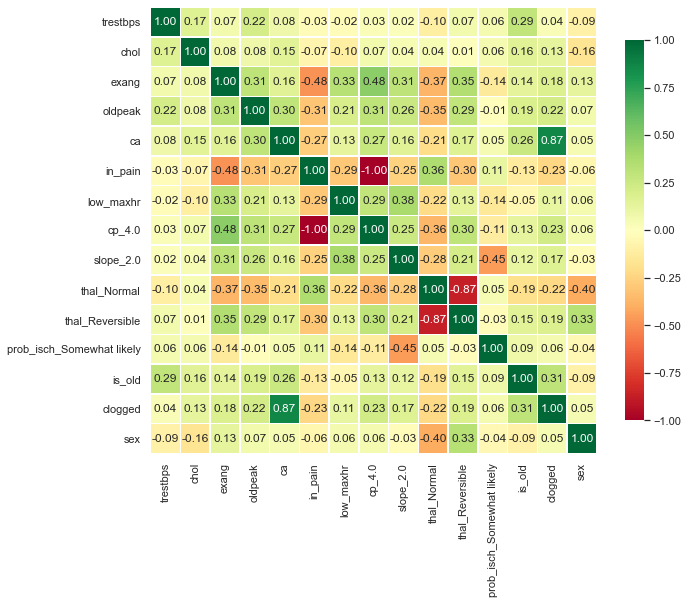

In [278]:
# Plot the correlation map
a_df = train_X[features3]
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(a_df.corr(),cmap='RdYlGn',vmax=1.0,center=0,fmt='.2f',square=True,linewidths=.5,annot=True,cbar_kws={"shrink":.70})


We will consider any two features with acorrelation value higher than 0.5 as strongly correlated. From the heatmap above these include

 - 'ca' and 'clogged' (r = 0.87)
 - 'cp_4.0' and 'in_pain' (r = -1.00)
 - 'thal_Reversible' and 'thal_Normal' (r = -0.87)
 

We only need one of each feature from these pairs. The features we will keep are
 
 - 'clogged'
 - 'in_pain'
 - 'thal_Reversible'
 
 

In [279]:
# Get rid of ca, cp_4.0, thal_Normal
features4 = ['trestbps', 'chol', 'exang', 'oldpeak',  'in_pain', 'low_maxhr',
        'slope_2.0',  'thal_Reversible',
       'prob_isch_Somewhat likely','is_old','clogged','sex']
train_test_lr(features4)

AUC Score : 0.9065934065934066
Accuracy Score : 0.8688524590163934


Our model improved with an AUC score of 0.906 and an accuracy of 86.88%.